In [1]:
import matplotlib.pyplot as plt
import os
import numpy as np
from scipy.io import loadmat
from upsample import *

In [2]:
path = '../../../data/rdr_sparse_data/sparse_radar_tensor_wide_range/rtnh_wider_1p_1/1'
files = os.listdir(path)
for file in files[:1]:
    rdr_sparse_data = np.load(os.path.join(path, file))
    print(rdr_sparse_data.shape)
    rdr_sparse_xyz = rdr_sparse_data.transpose()[:3]
    print(rdr_sparse_xyz.shape)

(150000, 4)
(3, 150000)


(3, 150000)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

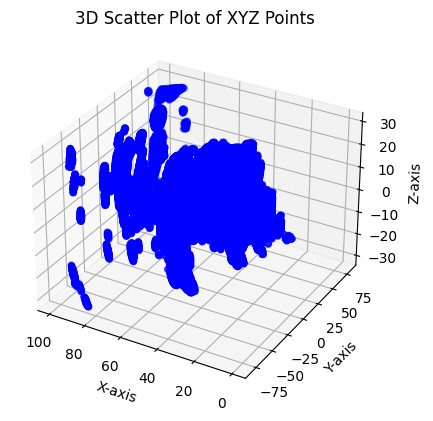

In [7]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
print(rdr_sparse_xyz.shape)
# Create the 3D scatter plot
ax.scatter(rdr_sparse_xyz[0], rdr_sparse_xyz[1], rdr_sparse_xyz[2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')

In [4]:
rdr_sparse_data = upsample_rdr_sparse_xyzpw(
    rdr_sparse_data,
    base_samples_per_point=6,
    sigma_xyz=(0.25, 0.25, 0.40),
    bev_cell=(0.5, 0.5),
    bev_extent=((-60., 60.), (0., 120.)),
    density_exponent=1.0,      # set 0.0 to ignore BEV density
    include_original=True,
    power_mode="multiply",
    kernel="gaussian",         # or "sinc2"
    sinc_w=0.8,                # ~ lateral mainlobe width (m), if kernel="sinc2"
    power_noise_std=0.0,
    min_power=0.0,             # clip to nonnegative if your pipeline expects that
    max_power=None
)

(3, 309562)


Text(0.5, 0.92, '3D Scatter Plot of XYZ Points')

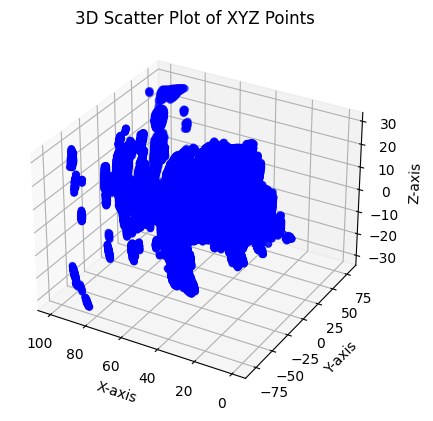

In [6]:
rdr_upsampled_xyz = rdr_sparse_data.transpose()[:3]
print(rdr_upsampled_xyz.shape)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Create the 3D scatter plot
ax.scatter(rdr_upsampled_xyz[0], rdr_upsampled_xyz[1], rdr_upsampled_xyz[2], c='b', marker='o') # 'c' for color, 'marker' for shape

# Set labels for the axes
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.invert_xaxis()
# Set a title for the plot
ax.set_title('3D Scatter Plot of XYZ Points')

In [12]:
path = './sequences/1/radar_zyx_cube'
files = os.listdir(path)
data = loadmat(os.path.join(path, files[0]))
data['arr_zyx'].shape

(150, 400, 250)